# List 2-2

- 배열 : 2차원 배열

- 부분집합 생성

- 바이너리 서치(Binary Search)

- Selection Algorithm

- Selectin Search

## 부분집합 생성

- 집합의 원소가 n개일 때, 공집합을 포함한 부분집합의 수는 2^n개이다.

ex) {1, 2, 3, 4} => 2 x 2 x 2 x 2 = 16


In [2]:
# 각 원소가 부분집합에 포함되었는지를 loop를 이용항 확인하고 부분집합을 생성하는 방법
def print_subset(bit, arr, n):
    total = 0                           # 전체 합
    for i in range(n):
        if bit[i]:
            print(arr[i], end=' ')
            total += arr[i]
    print(bit, total)

arr = [1, 2, 3, 4]
bit = [0, 0, 0, 0]

for i in range(2):
    bit[0] = i                  # 0번 원소
    for j in range(2):
        bit[1] = j              # 1번 원소
        for k in range(2):
            bit[2] = k          # 2번 원소
            for l in range(2):
                bit[3] = l      # 3번 원소
                print_subset(bit, arr, len(bit))

[0, 0, 0, 0] 0
4 [0, 0, 0, 1] 4
3 [0, 0, 1, 0] 3
3 4 [0, 0, 1, 1] 7
2 [0, 1, 0, 0] 2
2 4 [0, 1, 0, 1] 6
2 3 [0, 1, 1, 0] 5
2 3 4 [0, 1, 1, 1] 9
1 [1, 0, 0, 0] 1
1 4 [1, 0, 0, 1] 5
1 3 [1, 0, 1, 0] 4
1 3 4 [1, 0, 1, 1] 8
1 2 [1, 1, 0, 0] 3
1 2 4 [1, 1, 0, 1] 7
1 2 3 [1, 1, 1, 0] 6
1 2 3 4 [1, 1, 1, 1] 10


however, 위 방법에서 bit의 개수가 변한다면 몇 개의 for문을 사용해야 하는지 정할 수 없다.

#### 비트연산자

    & : AND

        - i & (1 << j) : i의 j번째 비트가 1인지 아닌지를 검사

    | : OR

    << : left shift one

        - 1(decimal to binary 로 변환된 값) << n : 2^n 즉 원소가 n개일 경우의 모든 부분집합의 수를 의미

    >> : right shift one

left shift one : 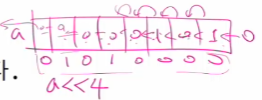 

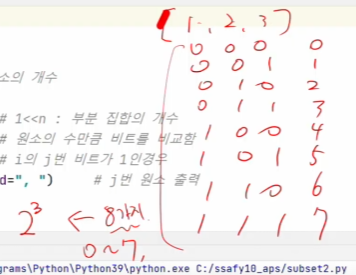

In [17]:
# bit를 사용하여 부분집합 판별

arr = [3, 6, 2, 8, 4, 2]
#      1  0  0  0  0  0
#      0  1  0  0  0  0
#      1  1  0  0  0  0
#      0  0  1  0  0  0
#      1  0  1  0  0  0
#           ...

n = len(arr)

for i in range(1 << n):     # i : i 번째 부분집합을 검사하겠다.(0 <= i < 64)
    # i 번째 부분집합이 n개의 원소 중에 j번째 원소를 포함하는지 검사
    print(f'{i} : ', end=' ')
    for j in range(n):          # 원소의 개수가 n : n번 검사
        if i & (1 << j):        # 부분집합 i가 j번째 원소를 포함하는지 검사
            print(arr[j], end=' ')
    print()
print()

0 :  
1 :  3 
2 :  6 
3 :  3 6 
4 :  2 
5 :  3 2 
6 :  6 2 
7 :  3 6 2 
8 :  8 
9 :  3 8 
10 :  6 8 
11 :  3 6 8 
12 :  2 8 
13 :  3 2 8 
14 :  6 2 8 
15 :  3 6 2 8 
16 :  4 
17 :  3 4 
18 :  6 4 
19 :  3 6 4 
20 :  2 4 
21 :  3 2 4 
22 :  6 2 4 
23 :  3 6 2 4 
24 :  8 4 
25 :  3 8 4 
26 :  6 8 4 
27 :  3 6 8 4 
28 :  2 8 4 
29 :  3 2 8 4 
30 :  6 2 8 4 
31 :  3 6 2 8 4 
32 :  2 
33 :  3 2 
34 :  6 2 
35 :  3 6 2 
36 :  2 2 
37 :  3 2 2 
38 :  6 2 2 
39 :  3 6 2 2 
40 :  8 2 
41 :  3 8 2 
42 :  6 8 2 
43 :  3 6 8 2 
44 :  2 8 2 
45 :  3 2 8 2 
46 :  6 2 8 2 
47 :  3 6 2 8 2 
48 :  4 2 
49 :  3 4 2 
50 :  6 4 2 
51 :  3 6 4 2 
52 :  2 4 2 
53 :  3 2 4 2 
54 :  6 2 4 2 
55 :  3 6 2 4 2 
56 :  8 4 2 
57 :  3 8 4 2 
58 :  6 8 4 2 
59 :  3 6 8 4 2 
60 :  2 8 4 2 
61 :  3 2 8 4 2 
62 :  6 2 8 4 2 
63 :  3 6 2 8 4 2 



## 검색 

- 저장되어 있는 자료 중 원하는 항목을 찾는 작업

- 탐색 키(search key) : 자료를 구별하여 인식할 수 있는 키

1. 순차 검색(sequential search)

2. 이진 검색(binary search)

3. 해시(hash)

<br>

### 순차 검색 

- 일렬로 되어 있는 자료를 순서대로 검색하는 방법

    - 가장 직관적

    - 배열 / 연결리스트에서 자료를 찾을 시 유용

    1. 정렬되지 않은 경우

        - 찾고자 하는 원소의 순서에 따라 비교횟수가 결정된다

        - (1/n) * (1+2+3+ ... +n) = (n+1) / 2

        시간복잡도 : O(n)

    2. 정렬된 경우 : 순차탐색이 가능

        시간복잡도 : O(n)

<br>

### 이진 검색(매우 중요)

- 자료의 가운데에 있는 항목의 키 값과 비교하여 다음 검색의 위치를 결정하고 검색을 계속 진행하는 방법

    - 목적 키를 찾을 때까지 이진 검색을 순환적으로 반복 수행함으로써 검색 범위를 반으로 줄여가면서 보다 빠르게 검색을 수행

**!!!!! 이진 검색을 사용하기 위해서는 자료가 무조건 정렬된 상태여야 한다 !!!!!**

- 검색 과정

    1. 자료의 중앙에 있는 원소를 고른다

    2. 중앙 원소의 값과 찾고자 하는 목표 값을 비교한다.

    3. 목표 값이 중앙 원소의 값보다 작으면 자료의 왼쪽 반에 대해 새로 검색을 수행하고, 크다면 자료의 오른쪽 반에 대해 새로운 검색을 수행

    4. 찾고자 하는 값을 찾을 때까지 1~3 과정을 반복

In [8]:
# binary search

def binary_search(a, N, key):
    left = 0
    right = N - 1
    
    while left <= right:            # 탐색 구가이 존재, 원소가 한 개 이상
        mid = (left + right) // 2
        if a[mid] == key:           # 검색 성공
            return True
        elif a[mid] < key:
            right = mid - 1
        else:
            left = mid + 1
    return False

### 선택 정렬(중요)

- 주어진 자료들 중 가장 작은 값의 원소부터 차례대로 선택하여 위치를 교환하는 방식

정렬 알고리즘을 이용하여 자료 정렬하기 -> 원하는 순서에 있는 원소 가져오기

- 정렬 과정

    1. 주어진 리스트 중에서 최소값을 찾는다.

    2. 그 값을 리스트의 맨 앞과 위치한 값과 교환한다.

    3. 미정렬 리스트에서 최소값을 찾는다.

    4. 미정렬 리스트의 맨 앞에 위치한 값과 교환한다.

    정렬된 원소 | 미정렬 원소

Time complexity : O(n^2)

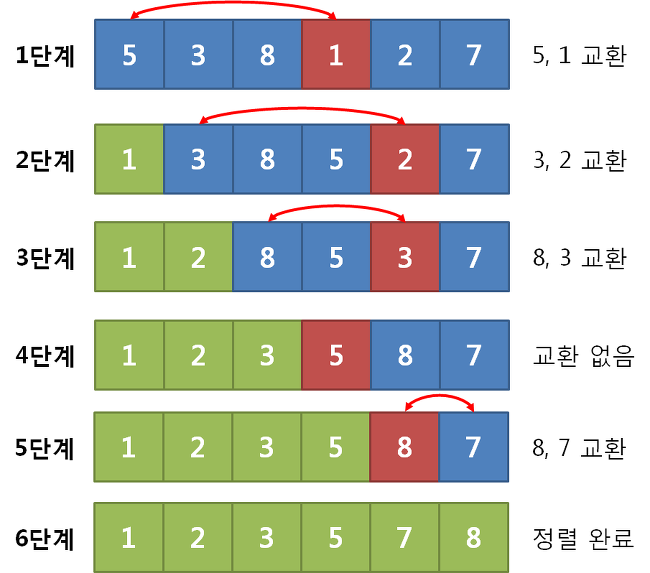


```python
# pseudo code
def SelectionSort(a[], n):
    for i from 0 to n - 2
        a[i], ... , a[n-1] 원소 중 최소값 a[k]를 찾음
        a[i]와 a[k] 교환
```

In [ ]:
# Selection Sort

def selection_sort(a, N):
    for i in range(N - 1):
        minIdx = i
        for j in range(i + 1, N):
            if a[minIdx] > a[j]:
                minIdx = j
        a[i], a[minIdx] = a[minIdx], a[i]